<a href="https://colab.research.google.com/github/angeljoseph23/MLAI-day1/blob/main/day4actvdia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dim=sns.load_dataset('diamonds')
dim.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
dim.drop_duplicates(inplace=True)

In [ ]:
dim.duplicated().sum()

np.int64(0)

In [ ]:
dim.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


<Axes: >

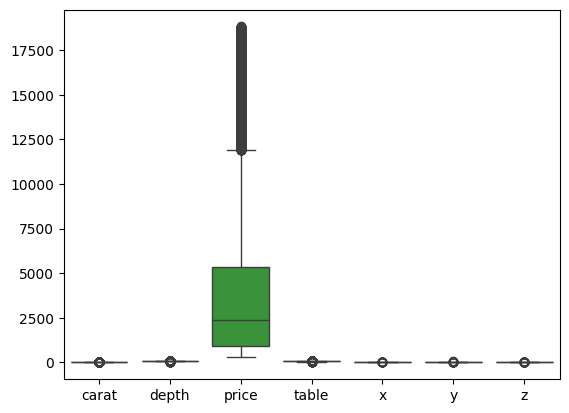

In [ ]:
sns.boxplot(data=dim[['carat','depth','price','cut','color','clarity','table','x','y','z']])

In [ ]:

Q1 = dim['price'].quantile(0.25)
Q3=dim['price'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(Q1,Q3,IQR,lower_bound,upper_bound)
dim['price']=dim['price'].clip(lower_bound,upper_bound)


951.0 5326.75 4375.75 -5612.625 11890.375


In [ ]:
dim

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


<Axes: >

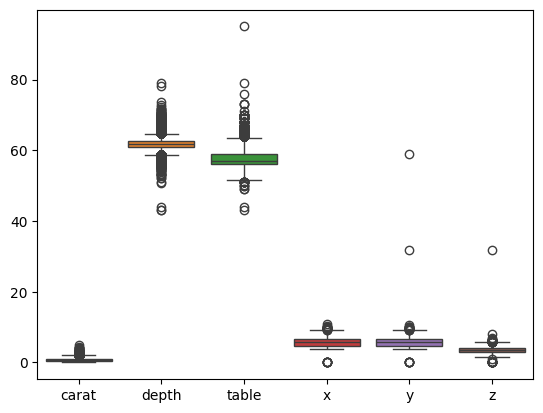

In [ ]:
sns.boxplot(data=dim[['carat','depth','cut','color','clarity','table','x','y','z']])

In [ ]:
cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
Q1 = dim[cols].quantile(0.25)
Q3=dim[cols].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(Q1,Q3,IQR,lower_bound,upper_bound)
for col in cols:
    dim[col] = dim[col].clip(lower=lower_bound[col], upper=upper_bound[col])

carat     0.40
depth    61.00
table    56.00
x         4.71
y         4.72
z         2.91
Name: 0.25, dtype: float64 carat     1.04
depth    62.50
table    59.00
x         6.54
y         6.54
z         4.03
Name: 0.75, dtype: float64 carat    0.64
depth    1.50
table    3.00
x        1.83
y        1.82
z        1.12
dtype: float64 carat    -0.560
depth    58.750
table    51.500
x         1.965
y         1.990
z         1.230
dtype: float64 carat     2.000
depth    64.750
table    63.500
x         9.285
y         9.270
z         5.710
dtype: float64


<Axes: >

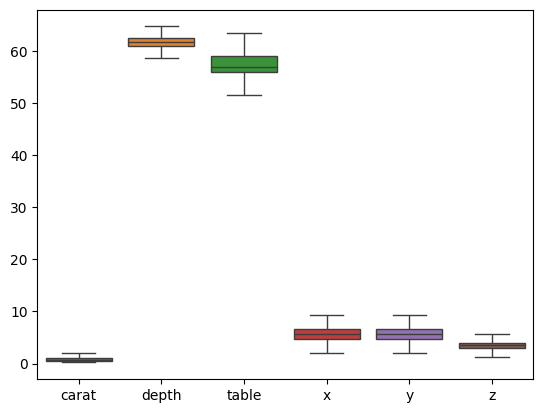

In [ ]:
sns.boxplot(data=dim[['carat','depth','cut','color','clarity','table','x','y','z']])

<Axes: >

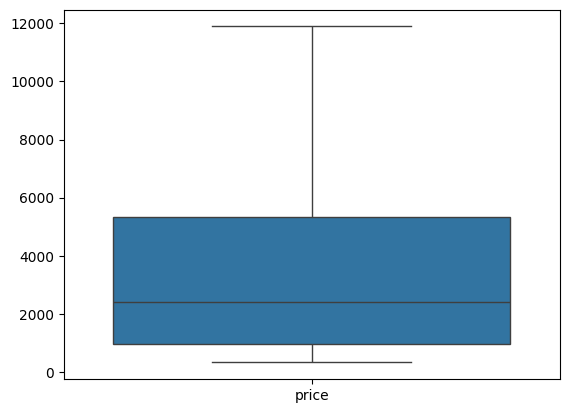

In [ ]:
sns.boxplot(data=dim[['price']])

In [ ]:
dim.nunique()

,0
carat,181
cut,5
color,7
clarity,8
depth,62
table,107
price,9088
x,534
y,534
z,349


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dim['color']=le.fit_transform(dim['color'])
dim['clarity']=le.fit_transform(dim['clarity'])
dim.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,3,61.50,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,1,2,59.80,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,1,4,58.75,63.5,327.0,4.05,4.07,2.31
3,0.29,Premium,5,5,62.40,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,6,3,63.30,58.0,335.0,4.34,4.35,2.75
5,0.24,Very Good,6,7,62.80,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,5,6,62.30,57.0,336.0,3.95,3.98,2.47
7,0.26,Very Good,4,2,61.90,55.0,337.0,4.07,4.11,2.53
8,0.22,Fair,1,5,64.75,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,4,4,59.40,61.0,338.0,4.00,4.05,2.39


In [ ]:
dim=pd.get_dummies(dim,columns=['cut'],dtype=int,drop_first=True)
dim.head()

,carat,color,clarity,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0.23,1,3,61.50,55.0,326.0,3.95,3.98,2.43,0,0,0,0
1,0.21,1,2,59.80,61.0,326.0,3.89,3.84,2.31,1,0,0,0
2,0.23,1,4,58.75,63.5,327.0,4.05,4.07,2.31,0,0,1,0
3,0.29,5,5,62.40,58.0,334.0,4.20,4.23,2.63,1,0,0,0
4,0.31,6,3,63.30,58.0,335.0,4.34,4.35,2.75,0,0,1,0


<Axes: >

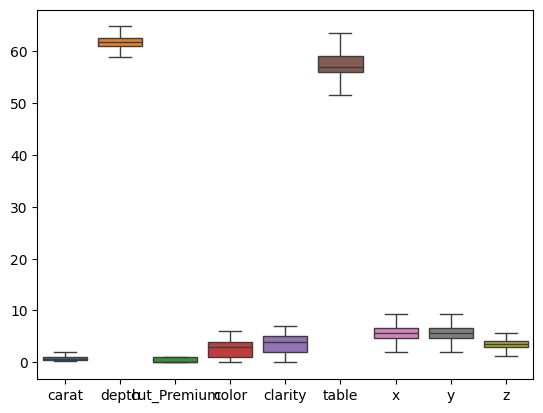

In [ ]:
sns.boxplot(data=dim[['carat','depth','cut_Premium','color','clarity','table','x','y','z']])

In [ ]:
num_cols=['clarity','color','table','price','x','y','z','carat','depth']
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd = StandardScaler()
dim_scaled =dim.copy()
dim_scaled[num_cols] = sd.fit_transform(dim[num_cols])
dim_scaled.head()

,carat,color,clarity,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,-1.231626,-0.936990,-0.484540,-0.195421,-1.128944,-0.991351,-1.591834,-1.578125,-1.602213,0,0,0,0
1,-1.275419,-0.936990,-1.064299,-1.534394,1.647588,-0.991351,-1.645452,-1.704130,-1.775667,1,0,0,0
2,-1.231626,-0.936990,0.095218,-2.361406,2.804477,-0.991060,-1.502471,-1.497122,-1.775667,0,0,1,0
3,-1.100245,1.414429,0.674977,0.513447,0.259322,-0.989023,-1.368426,-1.353115,-1.313123,1,0,0,0
4,-1.056452,2.002284,-0.484540,1.222315,0.259322,-0.988732,-1.243317,-1.245111,-1.139669,0,0,1,0


In [ ]:
dim_scaled.describe()

,carat,color,clarity,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair
count,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,53794.000000,53794.000000,53794.000000,53794.000000
mean,-1.521629e-16,-1.151789e-16,1.183489e-16,-2.539087e-15,-1.176093e-15,5.072097e-17,6.234453e-16,-5.537040e-16,2.430380e-16,0.255568,0.224356,0.090921,0.029706
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.436184,0.417161,0.287499,0.169776
min,-1.297316e+00,-1.524844e+00,-2.223817e+00,-2.361406e+00,-2.748587e+00,-9.913506e-01,-3.365696e+00,-3.369201e+00,-3.336751e+00,0.000000,0.000000,0.000000,0.000000
25%,-8.593815e-01,-9.369897e-01,-1.064299e+00,-5.892365e-01,-6.661883e-01,-8.094889e-01,-9.126729e-01,-9.120966e-01,-9.083975e-01,0.000000,0.000000,0.000000,0.000000
50%,-2.024804e-01,2.387197e-01,9.521820e-02,4.086841e-02,-2.034329e-01,-3.875700e-01,-2.797624e-02,-2.105873e-02,-1.221943e-02,0.000000,0.000000,0.000000,0.000000
75%,5.420075e-01,8.265743e-01,6.749769e-01,5.922102e-01,7.220778e-01,4.637607e-01,7.226755e-01,7.259731e-01,7.105048e-01,1.000000,0.000000,0.000000,0.000000
max,2.644091e+00,2.002284e+00,1.834494e+00,2.364380e+00,2.804477e+00,2.373635e+00,3.175698e+00,3.183078e+00,3.138858e+00,1.000000,1.000000,1.000000,1.000000


In [ ]:
#min-max scaling
num_cols=['clarity','color','table','price','x','y','z','carat','depth']
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mm = MinMaxScaler()
dim_minmax =dim.copy()
dim_minmax[num_cols] = mm.fit_transform(dim[num_cols])
dim_minmax.head()

,carat,color,clarity,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0.016667,0.166667,0.428571,0.458333,0.291667,0.000000,0.271175,0.273352,0.267857,0,0,0,0
1,0.005556,0.166667,0.285714,0.175000,0.791667,0.000000,0.262978,0.254121,0.241071,1,0,0,0
2,0.016667,0.166667,0.571429,0.000000,1.000000,0.000086,0.284836,0.285714,0.241071,0,0,1,0
3,0.050000,0.833333,0.714286,0.608333,0.541667,0.000692,0.305328,0.307692,0.312500,1,0,0,0
4,0.061111,1.000000,0.428571,0.758333,0.541667,0.000778,0.324454,0.324176,0.339286,0,0,1,0


In [ ]:
dim_minmax.describe()

,carat,color,clarity,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.329150,0.432319,0.547966,0.499685,0.494968,0.294608,0.514523,0.514203,0.515280,0.255568,0.224356,0.090921,0.029706
std,0.253719,0.283519,0.246410,0.211607,0.180082,0.297181,0.152874,0.152620,0.154427,0.436184,0.417161,0.287499,0.169776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.166667,0.285714,0.375000,0.375000,0.054045,0.375000,0.375000,0.375000,0.000000,0.000000,0.000000,0.000000
50%,0.277778,0.500000,0.571429,0.508333,0.458333,0.179430,0.510246,0.510989,0.513393,0.000000,0.000000,0.000000,0.000000
75%,0.466667,0.666667,0.714286,0.625000,0.625000,0.432427,0.625000,0.625000,0.625000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dim_num = dim.select_dtypes(include=['float64', 'int64'])
corr_matrix=dim_num.corr()
corr_matrix


,carat,color,clarity,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair
carat,1.000000,0.288664,-0.213121,0.021519,0.186775,0.936545,0.981959,0.981231,0.977588,0.116488,0.011664,0.034850,0.088284
color,0.288664,1.000000,-0.028002,0.047272,0.026655,0.175981,0.270060,0.269780,0.273426,0.035473,-0.008748,-0.004213,0.026450
clarity,-0.213121,-0.028002,1.000000,-0.047974,-0.089493,-0.074318,-0.225585,-0.222692,-0.228238,-0.052483,0.003725,-0.066191,-0.087384
depth,0.021519,0.047272,-0.047974,1.000000,-0.299939,-0.009098,-0.029115,-0.031816,0.089743,-0.218397,0.033878,0.180671,0.243771
table,0.186775,0.026655,-0.089493,-0.299939,1.000000,0.136167,0.197725,0.191757,0.157434,0.354486,0.128513,0.174376,0.096657
price,0.936545,0.175981,-0.074318,-0.009098,0.136167,1.000000,0.911937,0.913459,0.905015,0.097123,0.008524,0.001528,0.022183
x,0.981959,0.270060,-0.225585,-0.029115,0.197725,0.911937,1.000000,0.998357,0.988258,0.126657,0.004447,0.029784,0.079840
y,0.981231,0.269780,-0.222692,-0.031816,0.191757,0.913459,0.998357,1.000000,0.987882,0.109306,0.017684,0.032853,0.070018
z,0.977588,0.273426,-0.228238,0.089743,0.157434,0.905015,0.988258,0.987882,1.000000,0.092235,0.014803,0.045874,0.110758
cut_Premium,0.116488,0.035473,-0.052483,-0.218397,0.354486,0.097123,0.126657,0.109306,0.092235,1.000000,-0.315121,-0.185298,-0.102520


<Axes: >

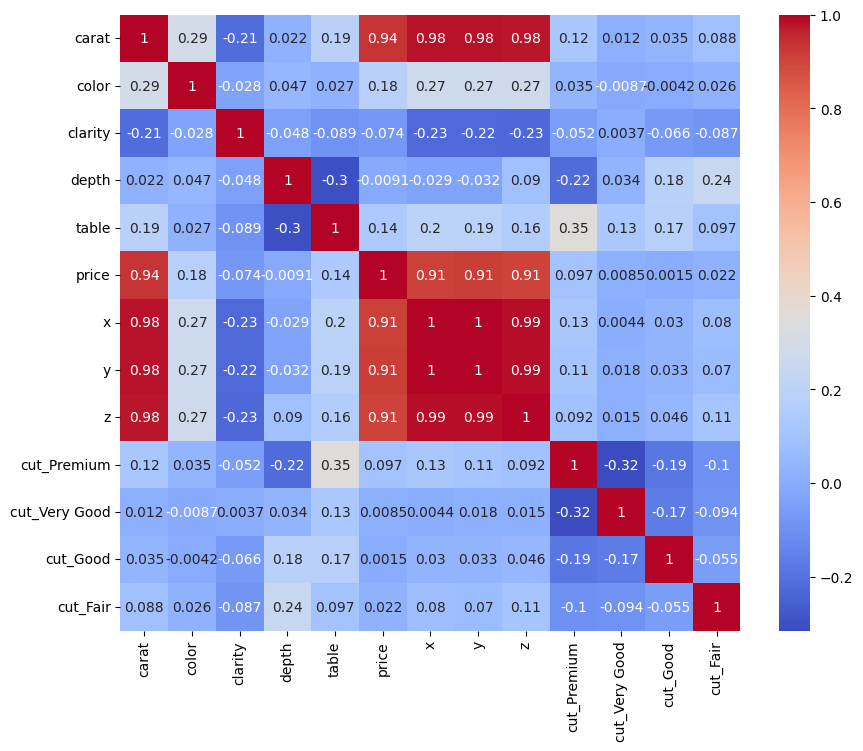

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [ ]:
dim_num2 = dim_minmax.select_dtypes(include=['float64', 'int64'])
corr_matrix2=dim_num2.corr()
corr_matrix2


,carat,color,clarity,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair
carat,1.000000,0.288664,-0.213121,0.021519,0.186775,0.936545,0.981959,0.981231,0.977588,0.116488,0.011664,0.034850,0.088284
color,0.288664,1.000000,-0.028002,0.047272,0.026655,0.175981,0.270060,0.269780,0.273426,0.035473,-0.008748,-0.004213,0.026450
clarity,-0.213121,-0.028002,1.000000,-0.047974,-0.089493,-0.074318,-0.225585,-0.222692,-0.228238,-0.052483,0.003725,-0.066191,-0.087384
depth,0.021519,0.047272,-0.047974,1.000000,-0.299939,-0.009098,-0.029115,-0.031816,0.089743,-0.218397,0.033878,0.180671,0.243771
table,0.186775,0.026655,-0.089493,-0.299939,1.000000,0.136167,0.197725,0.191757,0.157434,0.354486,0.128513,0.174376,0.096657
price,0.936545,0.175981,-0.074318,-0.009098,0.136167,1.000000,0.911937,0.913459,0.905015,0.097123,0.008524,0.001528,0.022183
x,0.981959,0.270060,-0.225585,-0.029115,0.197725,0.911937,1.000000,0.998357,0.988258,0.126657,0.004447,0.029784,0.079840
y,0.981231,0.269780,-0.222692,-0.031816,0.191757,0.913459,0.998357,1.000000,0.987882,0.109306,0.017684,0.032853,0.070018
z,0.977588,0.273426,-0.228238,0.089743,0.157434,0.905015,0.988258,0.987882,1.000000,0.092235,0.014803,0.045874,0.110758
cut_Premium,0.116488,0.035473,-0.052483,-0.218397,0.354486,0.097123,0.126657,0.109306,0.092235,1.000000,-0.315121,-0.185298,-0.102520


<Axes: >

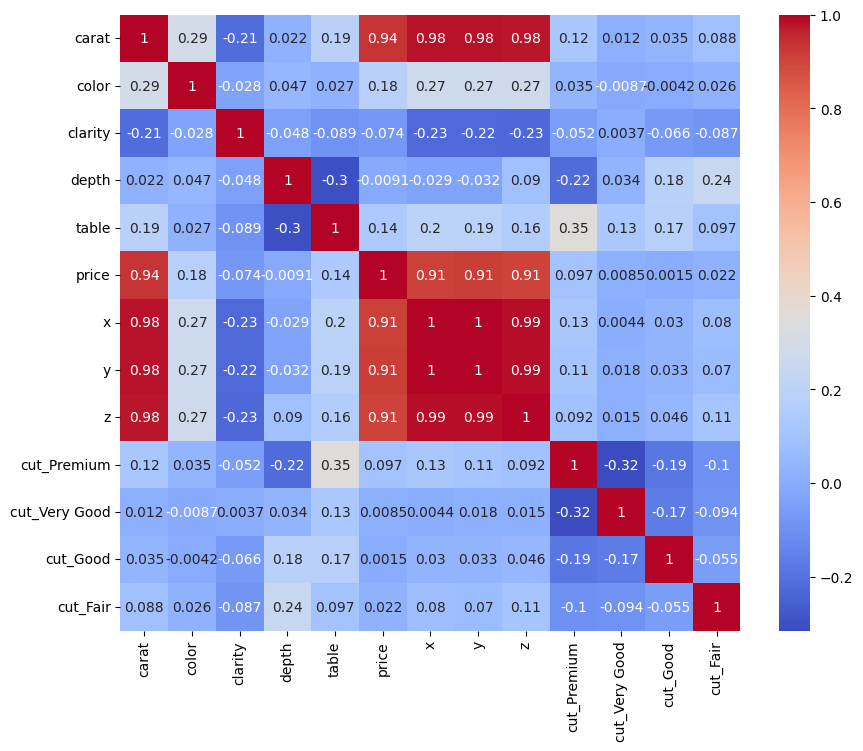

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix2,annot=True,cmap='coolwarm')

In [ ]:
dim_num3 = dim_scaled.select_dtypes(include=['float64', 'int64'])
corr_matrix3=dim_num3.corr()
corr_matrix3



,carat,color,clarity,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair
carat,1.000000,0.288664,-0.213121,0.021519,0.186775,0.936545,0.981959,0.981231,0.977588,0.116488,0.011664,0.034850,0.088284
color,0.288664,1.000000,-0.028002,0.047272,0.026655,0.175981,0.270060,0.269780,0.273426,0.035473,-0.008748,-0.004213,0.026450
clarity,-0.213121,-0.028002,1.000000,-0.047974,-0.089493,-0.074318,-0.225585,-0.222692,-0.228238,-0.052483,0.003725,-0.066191,-0.087384
depth,0.021519,0.047272,-0.047974,1.000000,-0.299939,-0.009098,-0.029115,-0.031816,0.089743,-0.218397,0.033878,0.180671,0.243771
table,0.186775,0.026655,-0.089493,-0.299939,1.000000,0.136167,0.197725,0.191757,0.157434,0.354486,0.128513,0.174376,0.096657
price,0.936545,0.175981,-0.074318,-0.009098,0.136167,1.000000,0.911937,0.913459,0.905015,0.097123,0.008524,0.001528,0.022183
x,0.981959,0.270060,-0.225585,-0.029115,0.197725,0.911937,1.000000,0.998357,0.988258,0.126657,0.004447,0.029784,0.079840
y,0.981231,0.269780,-0.222692,-0.031816,0.191757,0.913459,0.998357,1.000000,0.987882,0.109306,0.017684,0.032853,0.070018
z,0.977588,0.273426,-0.228238,0.089743,0.157434,0.905015,0.988258,0.987882,1.000000,0.092235,0.014803,0.045874,0.110758
cut_Premium,0.116488,0.035473,-0.052483,-0.218397,0.354486,0.097123,0.126657,0.109306,0.092235,1.000000,-0.315121,-0.185298,-0.102520


<Axes: >

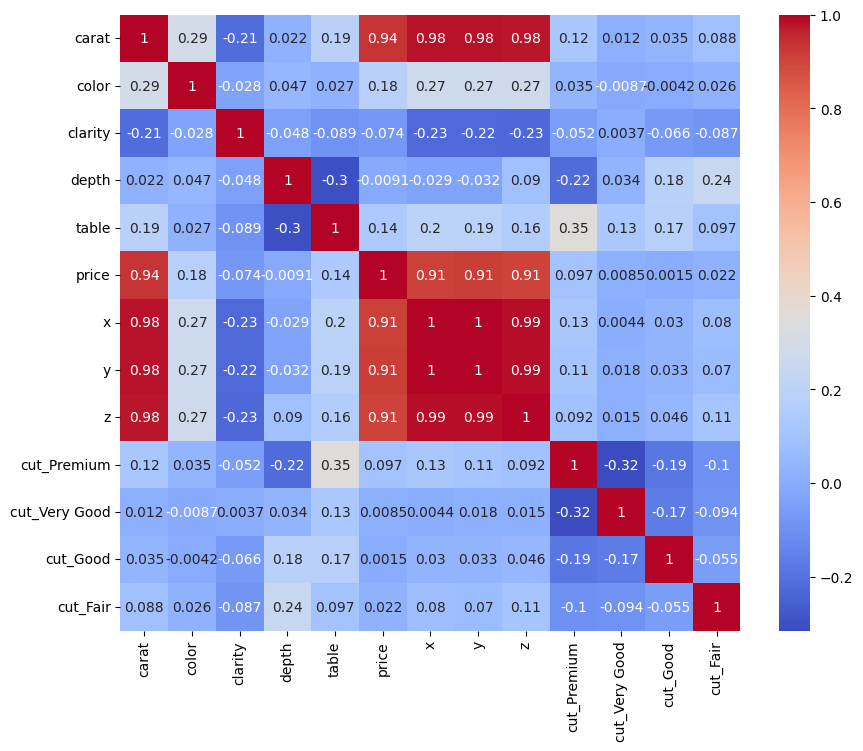

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix3,annot=True,cmap='coolwarm')

In [ ]:
dim_minmax

,carat,color,clarity,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0.016667,0.166667,0.428571,0.458333,0.291667,0.000000,0.271175,0.273352,0.267857,0,0,0,0
1,0.005556,0.166667,0.285714,0.175000,0.791667,0.000000,0.262978,0.254121,0.241071,1,0,0,0
2,0.016667,0.166667,0.571429,0.000000,1.000000,0.000086,0.284836,0.285714,0.241071,0,0,1,0
3,0.050000,0.833333,0.714286,0.608333,0.541667,0.000692,0.305328,0.307692,0.312500,1,0,0,0
4,0.061111,1.000000,0.428571,0.758333,0.541667,0.000778,0.324454,0.324176,0.339286,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.288889,0.000000,0.285714,0.341667,0.458333,0.210215,0.517077,0.517857,0.506696,0,0,0,0
53936,0.288889,0.000000,0.285714,0.725000,0.291667,0.210215,0.508880,0.516484,0.531250,0,0,1,0
53937,0.277778,0.000000,0.285714,0.675000,0.708333,0.210215,0.504781,0.506868,0.520089,0,1,0,0
53938,0.366667,0.666667,0.428571,0.375000,0.541667,0.210215,0.571721,0.567308,0.560268,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
y=dim['price']
x=dim_scaled.drop(columns=['price'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(43035, 12) (10759, 12) (43035,) (10759,)


In [ ]:
x_test.index

Index([43657,  4274, 47412, 44437, 13975, 11387, 40261, 49095, 37116, 10485,
       ...
       52586, 26548, 51174, 43338,  7200, 41789, 43542, 35783, 25885, 39329],
      dtype='int64', length=10759)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize and train the model
lr = LinearRegression()
lr_model = lr.fit(x_train, y_train)

# Predict on test data
lr_pred = lr_model.predict(x_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))
print("R-squared Score:", r2_score(y_test, lr_pred))

Mean Squared Error: 1010354.8332669665
R-squared Score: 0.9113944585513021
